## Energy data transformation

In [1]:
import pandas as pd
import openpyxl
import numpy as np
from matplotlib import pyplot as plt

**0. Load prerequisites**

In [2]:
datasets = !ls datasets
years = list(range(2000,2018))
countries = list(pd.read_csv('datasets/'+str(datasets[0])).Country)
print(*datasets, sep="\n")

(0)countries.csv
1971-2014Electric power consumption (kWh per capita).xls
(1990-2015)Consumption_GDP ratio.csv
1990-2015GDP per capita (current US$).xls
1990-2015Renewable electricity output (_ of total electricity output).xls
countrydatasheets_august2018 (1).xlsx
expenditures on R_D in percentage of GDP.xls
Global Climate Legislation Database.csv
household_EU_2009-2017_ilc_di04_1_Data.csv
(Not complete) R_D Total Support in Million Euros.xlsx


** 1. Percentage of the Total of Renewable energy consumption **

In [3]:
renewable_energy = pd.read_csv('datasets/'+str(datasets[2]))

In [4]:
renewable_energy.head()

,Entity,Code,Year,Renewable energy consumption (% of total final energy consumption) (% of total final energy consumption),"GDP per capita, PPP (constant 2011 international $) (constant 2011 international $)",Total population (Gapminder)
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1820,NaN,NaN,3280000.0
2,Afghanistan,AFG,1870,NaN,NaN,4207000.0
3,Afghanistan,AFG,1913,NaN,NaN,5730000.0
4,Afghanistan,AFG,1950,NaN,NaN,8151455.0


In [5]:
renewable_energy = renewable_energy[['Entity','Year',
                                     'Renewable energy consumption (% of total final energy consumption) (% of total final energy consumption)']]
renewable_energy.columns = ['country','year','percentage_renewable_energy']
renewable_energy = renewable_energy[(renewable_energy.year.isin(years)) & 
                                    (renewable_energy.country.isin(countries))]

In [6]:
renewable_energy.head(3)

,country,year,percentage_renewable_energy
161,Albania,2000,41.445416
162,Albania,2001,39.125664
163,Albania,2002,35.896294


** 2. Total RD&D in Million Euro **

In [7]:
research_energy = pd.read_excel('datasets/'+str(datasets[-1]), header=4 ,sheet_name='OECD.Stat export')

In [8]:
research_energy.head(3)

,Time,Unnamed: 1,1974,1975,1976,1977,1978,1979,1980,1981,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,NaN,..,..,..,..,..,0,14.431,16.799,...,35.027,31.066,97.929,72.585,52.407,51.642,21.583,21.449,15.088,21.936
2,Austria,NaN,..,..,..,14.891,16.478,15.204,19.663,16.422,...,27.352,42.722,62.972,70.77,60.305,59.508,64.833,58.456,67.333,65.747


In [9]:
research_energy = pd.melt(research_energy, id_vars=research_energy.columns[0], 
            value_vars=list(research_energy.columns[1:]), var_name='Year', value_name='rrd_million_euro')
research_energy.columns = ['country','year','rrd_million_euro']
research_energy = research_energy[(research_energy.year.isin(list(map(str,years))))&
                                 (research_energy.country.isin(countries))]
research_energy.year = list(map(int, research_energy.year))
research_energy.rrd_million_euro = [0 if type(i) == str else i for i in research_energy.rrd_million_euro]

In [10]:
research_energy.head(3)

,country,year,rrd_million_euro
893,Austria,2000,9.62
894,Belgium,2000,0.00
896,Czech Republic,2000,0.00


** 3. Electric power consumption (kWh per capita) **

In [11]:
electric_consumption = pd.read_excel('datasets/'+str(datasets[1]), header=3 ,sheet_name='Data')

In [12]:
electric_consumption.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,188.961667,206.340578,207.031259,219.356355,280.402518,312.476017,NaN,NaN,NaN,NaN


In [13]:
electric_consumption = pd.melt(electric_consumption, id_vars=electric_consumption.columns[0], 
            value_vars=list(electric_consumption.columns[1:]), var_name='Year',
            value_name='kwh_per_capita_consumption')
electric_consumption.columns = ['country','year','kwh_per_capita_consumption']
electric_consumption = electric_consumption[(electric_consumption.year.isin(list(map(str,years)))) &
                                           (electric_consumption.country.isin(countries))]
electric_consumption.year = list(map(int, electric_consumption.year))

In [14]:
electric_consumption.head(3)

,country,year,kwh_per_capita_consumption
11355,Albania,2000,1449.65
11356,Andorra,2000,NaN
11364,Austria,2000,7076.27


** 4. GDP per capita (current US$) **

In [15]:
gdp_per_capita = pd.read_excel('datasets/'+str(datasets[4]), header=3 ,sheet_name='Data')

In [16]:
gdp_per_capita #TODO fix

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,11.327377,12.101021,14.915254,14.912186,15.099280,14.856161,NaN,NaN,NaN
1,Afghanistan,AFG,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.176603,85.986547,82.487562,85.909980,78.636408,85.323549,86.050111,NaN,NaN,NaN
2,Angola,AGO,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.343189,67.957423,70.907804,60.799484,58.020935,53.175105,53.174928,NaN,NaN,NaN
3,Albania,ALB,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,99.980777,99.986786,98.592221,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN
4,Andorra,AND,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,76.543210,88.731145,86.513158,86.689420,88.753269,89.432177,86.116700,NaN,NaN,NaN
5,Arab World,ARB,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.328486,3.854010,3.549766,3.481219,3.770385,3.278073,2.920702,NaN,NaN,NaN
6,United Arab Emirates,ARE,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.094142,0.258307,0.232401,NaN,NaN,NaN
7,Argentina,ARG,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,28.927403,28.585456,32.305970,29.261135,31.484491,31.576204,28.140069,NaN,NaN,NaN
8,Armenia,ARM,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,35.672721,39.485441,33.539704,28.944749,28.236057,25.754839,28.336966,NaN,NaN,NaN
9,American Samoa,ASM,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.702427,0.703140,0.700882,0.885478,NaN,NaN,NaN


In [17]:
gdp_per_capita = pd.melt(gdp_per_capita, id_vars=gdp_per_capita.columns[0], 
            value_vars=list(gdp_per_capita.columns[1:]), var_name='Year', 
            value_name='gdp_per_capita')
gdp_per_capita.columns = ['country','year','gdp_per_capita']
gdp_per_capita = gdp_per_capita[(gdp_per_capita.year.isin(list(map(str,years)))) &
                               (gdp_per_capita.country.isin(countries))]
gdp_per_capita.year = list(map(int, gdp_per_capita.year))

In [18]:
gdp_per_capita

,country,year,gdp_per_capita
11355,Albania,2000,96.149
11356,Andorra,2000,100
11364,Austria,2000,72.544
11365,Azerbaijan,2000,8.20365
11367,Belgium,2000,1.26128
11371,Bulgaria,2000,6.57629
11374,Bosnia and Herzegovina,2000,48.8446
11375,Belarus,2000,0.103444
11387,Switzerland,2000,57.0005
11404,Czech Republic,2000,3.13259


** 5. Renewable electricity output (% of total electricity output)**

In [19]:
renewable_electricity = pd.read_excel('datasets/'+str(datasets[4]), header=3 ,sheet_name='Data')

In [20]:
renewable_electricity.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,11.327377,12.101021,14.915254,14.912186,15.099280,14.856161,NaN,NaN,NaN
1,Afghanistan,AFG,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.176603,85.986547,82.487562,85.909980,78.636408,85.323549,86.050111,NaN,NaN,NaN
2,Angola,AGO,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.343189,67.957423,70.907804,60.799484,58.020935,53.175105,53.174928,NaN,NaN,NaN


In [21]:
renewable_electricity = pd.melt(renewable_electricity, id_vars=renewable_electricity.columns[0], 
            value_vars=list(renewable_electricity.columns[1:]), 
            var_name='Year', 
            value_name='percentage_renewable_electricity')

renewable_electricity.columns = ['country','year','percentage_renewable_electricity']
renewable_electricity = renewable_electricity[(renewable_electricity.year.isin(list(map(str,years))))&
                                             (renewable_electricity.country.isin(countries))]
renewable_electricity.year = list(map(int, renewable_electricity.year))

In [22]:
renewable_electricity.head(3)

,country,year,percentage_renewable_electricity
11355,Albania,2000,96.149
11356,Andorra,2000,100
11364,Austria,2000,72.544


**6. Number of climate legislation acts**

In [23]:
legislation_acts =  pd.read_csv('datasets/'+str(datasets[-3]))

In [24]:
legislation_acts.head(3)

,Country,Name,Year Passed,Executive/Legislative,Framework,Categories,Document Type
0,Portugal,Decree-Law no. 4/2018 on incentives to electri...,2018,Executive,NaN,Energy Demand; Energy Supply; Transportation,Decree law
1,Macedonia (the former Yugoslav Republic of),Energy Law (compliant with the EU Third Energy...,2018,Legislative,NaN,Energy Supply,Law
2,France,Energy Renovation in Buildings Plan,2018,Executive,NaN,Energy Demand,Plan


In [25]:
legislation_acts = legislation_acts.groupby(['Country','Year Passed']).count()['Name'].reset_index()
legislation_acts.columns = ['country','year','number_of_legislation_acts']
legislation_acts = legislation_acts[(legislation_acts.year.isin(years)) &
                                   (legislation_acts.country.isin(countries))]

In [26]:
legislation_acts.head(3)

,country,year,number_of_legislation_acts
0,Albania,2003,1
1,Albania,2013,1
2,Albania,2017,1


** 7. CO2 emitions**

In [27]:
#pd.read_excel('datasets/'+str(datasets[7]), header=0 ,sheet='aggregator by year')


** 8. Gross domestic expenditure on R&D in % of GDP**

In [28]:
rd_expenditure = pd.read_excel('datasets/'+str(datasets[-4]), header=3 ,sheet_name='Sheet0')

In [29]:
rd_expenditure.head(3)

,geo\time,2000,Unnamed: 2,2001,Unnamed: 4,2002,Unnamed: 6,2003,Unnamed: 8,2004,...,2013,Unnamed: 28,2014,Unnamed: 30,2015,Unnamed: 32,2016,Unnamed: 34,2017,Unnamed: 36
0,EU28:EU (28 countries),0.24,(e),0.24,(e),0.23,(e),0.23,(e),0.23,...,0.25,NaN,0.24,NaN,0.24,NaN,0.23,NaN,0.23,(p)
1,EA19:Euro area (19 countries),0.26,(e),0.26,(e),0.26,(e),0.26,(e),0.26,...,0.28,NaN,0.28,NaN,0.28,NaN,0.27,NaN,0.28,(p)
2,BE:Belgium,0.12,NaN,0.12,NaN,0.14,NaN,0.13,NaN,0.14,...,0.2,NaN,0.21,NaN,0.23,NaN,0.23,(e),0.29,(p)


In [30]:
rd_expenditure = pd.melt(rd_expenditure, id_vars=rd_expenditure.columns[0], 
            value_vars=list(rd_expenditure.columns[1:]), var_name='Year', 
            value_name='rd_expenditure_on_share_gdp')
rd_expenditure.columns = ['country','year','rd_expenditure_on_share_gdp']
rd_expenditure.country = [i[3:] for i in rd_expenditure.country]
rd_expenditure = rd_expenditure[(rd_expenditure.year.isin(list(map(str,years)))) &
                               (rd_expenditure.country.isin(countries))]

rd_expenditure.year = list(map(int, rd_expenditure.year))
rd_expenditure.rd_expenditure_on_share_gdp = [
    0 if type(i) == str else i for i in rd_expenditure.rd_expenditure_on_share_gdp]

In [31]:
rd_expenditure.head(3)

,country,year,rd_expenditure_on_share_gdp
2,Belgium,2000,0.12
3,Bulgaria,2000,0.34
5,Denmark,2000,0.28


** 9. Median equivalised net income of EU Household**

In [32]:
household_income = pd.read_csv('datasets/'+str(datasets[-2]))

In [33]:
household_income.head(3)

,TIME,GEO,HHTYP,INDIC_IL,UNIT,Value,Flag and Footnotes
0,2009,"European Union (EU6-1958, EU9-1973, EU10-1981,...",Total,Median equivalised net income,Euro,"14,802",e
1,2009,"European Union (EU6-1958, EU9-1973, EU10-1981,...",Total,Median equivalised net income,National currency,:,NaN
2,2009,"European Union (EU6-1958, EU9-1973, EU10-1981,...",Total,Median equivalised net income,Purchasing power standard (PPS),:,NaN


In [34]:
household_income = household_income[(household_income.HHTYP=='Total') &
                                    ((household_income.UNIT=='Euro'))][['GEO','TIME','Value']]
household_income.columns = ['country','year','median_household_income']
household_income.country = [i.replace(
    'Germany (until 1990 former territory of the FRG)','Germany') for i in household_income.country]
household_income = household_income[(household_income.year.isin(years))&
                                   (household_income.country.isin(countries))]
replacement = [i.replace(',','.') for i in household_income.median_household_income]
replacement = [j.replace(':','0') for j in replacement]
household_income.median_household_income = list(map(float, replacement))

In [35]:
household_income.head(3)

,country,year,median_household_income
105,Belgium,2009,19.309
120,Bulgaria,2009,2.828
150,Denmark,2009,25.027


** Create an spreadsheet**

In [36]:
countries_years = pd.DataFrame()
countries_years['country'] = sorted(countries)*len(years)
countries_years['year'] = [i for s in [[y]*len(countries) for y in years] for i in s]

In [37]:
tables = {#'Countries Years':countries_years,
          'Renewable Energy':renewable_energy,
          'Research Energy':research_energy,
          'Electric Consumption':electric_consumption,
          'Gdp per Capita':gdp_per_capita,
          #'Renewable Electricity':renewable_electricity,
          #'Legislation Acts':legislation_acts,
          'RD Expenditure':rd_expenditure,
          'Household Income':household_income}

In [38]:
excelbook = pd.ExcelWriter('energy_data.xlsx')
for name, table in tables.items():
    table.to_excel(excelbook, name, index=False)
excelbook.save()    

In [39]:
#sort data and add rate of change %

for name,t in tables.items():
    t = t.sort_values(['country', 'year'])
    t['roc'] = t.iloc[:,-1].pct_change() #selects last column as target for % change
    tables[name]=t
    #print(_)
    #print(t.head(3))


In [40]:
#list of selected EU countries
eu_countries = ['Austria', 'Belgium', 'Bulgaria','Croatia','Cyprus','Czech','Denmark','Estonia','Finland','France','Germany','Greece','Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']#...

#timeframe 
years = np.arange(2000,2018,1)

y = np.array([y for y in years] * len(eu_countries))
c = np.ravel([[e for y in range(len(years))] for e in eu_countries])
countries_years = pd.DataFrame(np.c_[c,y])


time_series = countries_years.reset_index(drop = True)
for name, t in tables.items():
    t = t.drop(t[~t['country'].isin(eu_countries)].index)
    t =  t.reset_index(drop=True)
    time_series[name] = t['roc']

print(time_series.to_string())


                  0     1  Renewable Energy  Research Energy  Electric Consumption  Gdp per Capita  RD Expenditure  Household Income
0           Austria  2000          0.336242              NaN              2.064160       -0.157608             NaN               NaN
1           Austria  2001         -0.034265         0.255094              0.036313       -0.046691             NaN          0.028775
2           Austria  2002         -0.031346        -0.144443              0.012876       -0.002080             inf          0.019233
3           Austria  2003         -0.085318        -0.368248              0.036004       -0.119255       -1.000000          0.016028
4           Austria  2004          0.028371         0.904689              0.014695        0.056256             inf          0.012198
5           Austria  2005          0.041132        -0.025664              0.021711       -0.008963        0.090909          0.051556
6           Austria  2006          0.086035        -0.001239         

In [41]:
def country_series(country = 'Austria'):
    cs = time_series.loc[time_series[0]==country]
    cs = cs.set_index(cs[1]) #in case year as timestep is useful
    cs = cs.drop(0,1)
    cs = cs.drop(1,1)
    return cs

cs_austria = country_series('Austria')
cs_austria.head(3)

,Renewable Energy,Research Energy,Electric Consumption,Gdp per Capita,RD Expenditure,Household Income
1,,,,,,
2000,0.336242,NaN,2.064160,-0.157608,NaN,NaN
2001,-0.034265,0.255094,0.036313,-0.046691,NaN,0.028775
2002,-0.031346,-0.144443,0.012876,-0.002080,inf,0.019233


In [42]:
#https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = len(data.columns)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(data.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(data.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    #change infs to NaN values
    agg =  agg.replace([np.inf, -np.inf], np.nan)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

data = series_to_supervised(cs_austria, 1 , 1)
#drop columns we don't want to predict
data.drop(data.columns[[7,8,9,10,11]], axis=1, inplace = True)
data.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t)
1,,,,,,,
2006,0.041132,-0.025664,0.021711,-0.008963,0.090909,0.051556,0.086035
2007,0.086035,-0.001239,0.033433,0.029685,0.000000,0.002111,0.089382
2008,0.089382,-0.247272,-0.004479,0.048408,0.083333,0.018659,0.026406
2009,0.026406,2.004064,0.003112,0.007918,0.076923,0.044653,0.039454
2010,0.039454,0.561933,-0.035008,0.027572,0.000000,-0.219901,0.004746


In [43]:
countries_sequences = []
for country in eu_countries:
    sequence = series_to_supervised(country_series(country),1,1,False)
    sequence.drop(sequence.columns[[7,8,9,10,11]], axis=1, inplace = True)
    
    #turn rows to 0 with NaN values to mask them later
    sequence[pd.isnull(sequence).any(axis=1)] = 0
    countries_sequences.append(sequence.values)


countries_sequences = np.stack(countries_sequences,axis=0)
#example sequence for first country 
print(countries_sequences[0])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-8.53184822e-02 -3.68247822e-01  3.60037643e-02 -1.19254708e-01
  -1.00000000e+00  1.60275824e-02  2.83705681e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.11316170e-02 -2.56637168e-02  2.17111142e-02 -8.96318718e-03
   9.09090909e-02  5.15561999e-02  8.60349624e-02]
 [ 8.60349624e-02 -1.23854347e-03  3.34333166e-02  2.96847922e-02
   0.00000000e+00  2.11106803e-03  8.93824215e-02]
 [ 8.93824215e-02 -2.47271825e-01 -4.47906508e-03  4.84084313e-0

In [44]:
#training and test set
n_train_years = 12
train = countries_sequences[:,:n_train_years,:]
test = countries_sequences[:,n_train_years:,:]
#input and output
train_X, train_y = train[:,:, :-1], train[:,:, -1]
test_X, test_y = test[:,:,:-1], test[:,:, -1]
# reshape input and output to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0]*train_X.shape[1], 1, train_X.shape[2]))
test_X = test_X.reshape((test_X.shape[0]*test_X.shape[1], 1, test_X.shape[2]))
train_y = train_y.reshape((train_y.shape[0]*train_y.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(336, 1, 6) (336,) (168, 1, 6) (28, 6)


In [177]:
#example training data
data = []
for a in range(10):
    d1 = np.arange(a,a+5,1)
    d2 = np.arange(a,a+10,2)
    d3 = np.arange(a,a+15,3)
    d = np.stack([d1,d2,d3], axis = 1)
    data.append(d)

data = np.stack(data)

trainX, trainy = data[:,:-1,:],  data[:,-1,-1]
#reshape output to be 2D
trainy = np.reshape(trainy,(trainy.size,1))
print(trainX.shape,trainy.shape)

(10, 4, 3) (10, 1)


Epoch 1/1500
10/10 [==============================] - 2s 198ms/step - loss: 270.3595
Epoch 2/1500
10/10 [==============================] - 0s 401us/step - loss: 266.5252
Epoch 3/1500
10/10 [==============================] - 0s 449us/step - loss: 262.7278
Epoch 4/1500
10/10 [==============================] - 0s 413us/step - loss: 258.9847
Epoch 5/1500
10/10 [==============================] - 0s 437us/step - loss: 255.2806
Epoch 6/1500
10/10 [==============================] - 0s 1ms/step - loss: 251.6270
Epoch 7/1500
10/10 [==============================] - 0s 536us/step - loss: 248.0191
Epoch 8/1500
10/10 [==============================] - 0s 657us/step - loss: 244.4661
Epoch 9/1500
10/10 [==============================] - 0s 438us/step - loss: 240.9673
Epoch 10/1500
10/10 [==============================] - 0s 1ms/step - loss: 237.5173
Epoch 11/1500
10/10 [==============================] - 0s 453us/step - loss: 234.1256
Epoch 12/1500
10/10 [==============================] - 0s 1ms/step 

Epoch 97/1500
10/10 [==============================] - 0s 1ms/step - loss: 38.1072
Epoch 98/1500
10/10 [==============================] - 0s 867us/step - loss: 37.1904
Epoch 99/1500
10/10 [==============================] - 0s 753us/step - loss: 36.3124
Epoch 100/1500
10/10 [==============================] - 0s 538us/step - loss: 35.4679
Epoch 101/1500
10/10 [==============================] - 0s 501us/step - loss: 34.6619
Epoch 102/1500
10/10 [==============================] - 0s 636us/step - loss: 33.8993
Epoch 103/1500
10/10 [==============================] - 0s 633us/step - loss: 33.1795
Epoch 104/1500
10/10 [==============================] - 0s 1ms/step - loss: 32.4956
Epoch 105/1500
10/10 [==============================] - 0s 518us/step - loss: 31.8762
Epoch 106/1500
10/10 [==============================] - 0s 812us/step - loss: 31.3297
Epoch 107/1500
10/10 [==============================] - 0s 590us/step - loss: 30.8167
Epoch 108/1500
10/10 [==============================] - 0s 1m

Epoch 193/1500
10/10 [==============================] - 0s 824us/step - loss: 11.4377
Epoch 194/1500
10/10 [==============================] - 0s 800us/step - loss: 11.3456
Epoch 195/1500
10/10 [==============================] - 0s 682us/step - loss: 11.2551
Epoch 196/1500
10/10 [==============================] - 0s 430us/step - loss: 11.1656
Epoch 197/1500
10/10 [==============================] - 0s 511us/step - loss: 11.0771
Epoch 198/1500
10/10 [==============================] - 0s 791us/step - loss: 10.9902
Epoch 199/1500
10/10 [==============================] - 0s 684us/step - loss: 10.9048
Epoch 200/1500
10/10 [==============================] - 0s 660us/step - loss: 10.8209
Epoch 201/1500
10/10 [==============================] - 0s 518us/step - loss: 10.7381
Epoch 202/1500
10/10 [==============================] - 0s 919us/step - loss: 10.6565
Epoch 203/1500
10/10 [==============================] - 0s 516us/step - loss: 10.5760
Epoch 204/1500
10/10 [==============================] 

Epoch 290/1500
10/10 [==============================] - 0s 400us/step - loss: 5.7129
Epoch 291/1500
10/10 [==============================] - 0s 425us/step - loss: 5.6682
Epoch 292/1500
10/10 [==============================] - 0s 532us/step - loss: 5.6237
Epoch 293/1500
10/10 [==============================] - 0s 559us/step - loss: 5.5807
Epoch 294/1500
10/10 [==============================] - 0s 595us/step - loss: 5.5386
Epoch 295/1500
10/10 [==============================] - 0s 749us/step - loss: 5.4963
Epoch 296/1500
10/10 [==============================] - 0s 697us/step - loss: 5.4537
Epoch 297/1500
10/10 [==============================] - 0s 664us/step - loss: 5.4103
Epoch 298/1500
10/10 [==============================] - 0s 541us/step - loss: 5.3675
Epoch 299/1500
10/10 [==============================] - 0s 969us/step - loss: 5.3258
Epoch 300/1500
10/10 [==============================] - 0s 625us/step - loss: 5.2832
Epoch 301/1500
10/10 [==============================] - 0s 924us/

Epoch 387/1500
10/10 [==============================] - 0s 455us/step - loss: 2.4588
Epoch 388/1500
10/10 [==============================] - 0s 823us/step - loss: 2.4370
Epoch 389/1500
10/10 [==============================] - 0s 801us/step - loss: 2.4151
Epoch 390/1500
10/10 [==============================] - 0s 691us/step - loss: 2.3923
Epoch 391/1500
10/10 [==============================] - 0s 501us/step - loss: 2.3701
Epoch 392/1500
10/10 [==============================] - 0s 508us/step - loss: 2.3489
Epoch 393/1500
10/10 [==============================] - 0s 701us/step - loss: 2.3281
Epoch 394/1500
10/10 [==============================] - 0s 508us/step - loss: 2.3067
Epoch 395/1500
10/10 [==============================] - 0s 987us/step - loss: 2.2849
Epoch 396/1500
10/10 [==============================] - 0s 662us/step - loss: 2.2637
Epoch 397/1500
10/10 [==============================] - 0s 860us/step - loss: 2.2433
Epoch 398/1500
10/10 [==============================] - 0s 630us/

Epoch 484/1500
10/10 [==============================] - 0s 480us/step - loss: 1.0972
Epoch 485/1500
10/10 [==============================] - 0s 708us/step - loss: 1.0888
Epoch 486/1500
10/10 [==============================] - 0s 768us/step - loss: 1.0805
Epoch 487/1500
10/10 [==============================] - 0s 611us/step - loss: 1.0724
Epoch 488/1500
10/10 [==============================] - 0s 433us/step - loss: 1.0642
Epoch 489/1500
10/10 [==============================] - 0s 507us/step - loss: 1.0562
Epoch 490/1500
10/10 [==============================] - 0s 720us/step - loss: 1.0484
Epoch 491/1500
10/10 [==============================] - 0s 636us/step - loss: 1.0405
Epoch 492/1500
10/10 [==============================] - 0s 855us/step - loss: 1.0326
Epoch 493/1500
10/10 [==============================] - 0s 703us/step - loss: 1.0248
Epoch 494/1500
10/10 [==============================] - 0s 685us/step - loss: 1.0172
Epoch 495/1500
10/10 [==============================] - 0s 596us/

Epoch 581/1500
10/10 [==============================] - 0s 640us/step - loss: 0.5477
Epoch 582/1500
10/10 [==============================] - 0s 595us/step - loss: 0.5441
Epoch 583/1500
10/10 [==============================] - 0s 649us/step - loss: 0.5406
Epoch 584/1500
10/10 [==============================] - 0s 651us/step - loss: 0.5370
Epoch 585/1500
10/10 [==============================] - 0s 868us/step - loss: 0.5335
Epoch 586/1500
10/10 [==============================] - 0s 809us/step - loss: 0.5300
Epoch 587/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.5265
Epoch 588/1500
10/10 [==============================] - 0s 612us/step - loss: 0.5231
Epoch 589/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.5197
Epoch 590/1500
10/10 [==============================] - 0s 864us/step - loss: 0.5163
Epoch 591/1500
10/10 [==============================] - 0s 833us/step - loss: 0.5129
Epoch 592/1500
10/10 [==============================] - 0s 1ms/step -

Epoch 678/1500
10/10 [==============================] - 0s 678us/step - loss: 0.2933
Epoch 679/1500
10/10 [==============================] - 0s 508us/step - loss: 0.2916
Epoch 680/1500
10/10 [==============================] - 0s 479us/step - loss: 0.2897
Epoch 681/1500
10/10 [==============================] - 0s 777us/step - loss: 0.2878
Epoch 682/1500
10/10 [==============================] - 0s 626us/step - loss: 0.2861
Epoch 683/1500
10/10 [==============================] - 0s 537us/step - loss: 0.2842
Epoch 684/1500
10/10 [==============================] - 0s 642us/step - loss: 0.2824
Epoch 685/1500
10/10 [==============================] - 0s 788us/step - loss: 0.2807
Epoch 686/1500
10/10 [==============================] - 0s 802us/step - loss: 0.2789
Epoch 687/1500
10/10 [==============================] - 0s 787us/step - loss: 0.2772
Epoch 688/1500
10/10 [==============================] - 0s 440us/step - loss: 0.2755
Epoch 689/1500
10/10 [==============================] - 0s 453us/

Epoch 775/1500
10/10 [==============================] - 0s 518us/step - loss: 0.1641
Epoch 776/1500
10/10 [==============================] - 0s 696us/step - loss: 0.1632
Epoch 777/1500
10/10 [==============================] - 0s 497us/step - loss: 0.1623
Epoch 778/1500
10/10 [==============================] - 0s 2ms/step - loss: 0.1614
Epoch 779/1500
10/10 [==============================] - 0s 967us/step - loss: 0.1606
Epoch 780/1500
10/10 [==============================] - 0s 626us/step - loss: 0.1597
Epoch 781/1500
10/10 [==============================] - 0s 750us/step - loss: 0.1588
Epoch 782/1500
10/10 [==============================] - 0s 924us/step - loss: 0.1579
Epoch 783/1500
10/10 [==============================] - 0s 728us/step - loss: 0.1571
Epoch 784/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.1562
Epoch 785/1500
10/10 [==============================] - 0s 463us/step - loss: 0.1554
Epoch 786/1500
10/10 [==============================] - 0s 1ms/step -

Epoch 872/1500
10/10 [==============================] - 0s 609us/step - loss: 0.1002
Epoch 873/1500
10/10 [==============================] - 0s 542us/step - loss: 0.0997
Epoch 874/1500
10/10 [==============================] - 0s 693us/step - loss: 0.0993
Epoch 875/1500
10/10 [==============================] - 0s 911us/step - loss: 0.0988
Epoch 876/1500
10/10 [==============================] - 0s 534us/step - loss: 0.0983
Epoch 877/1500
10/10 [==============================] - 0s 518us/step - loss: 0.0978
Epoch 878/1500
10/10 [==============================] - 0s 646us/step - loss: 0.0974
Epoch 879/1500
10/10 [==============================] - 0s 989us/step - loss: 0.0969
Epoch 880/1500
10/10 [==============================] - 0s 590us/step - loss: 0.0964
Epoch 881/1500
10/10 [==============================] - 0s 751us/step - loss: 0.0959
Epoch 882/1500
10/10 [==============================] - 0s 589us/step - loss: 0.0955
Epoch 883/1500
10/10 [==============================] - 0s 977us/

Epoch 969/1500
10/10 [==============================] - 0s 651us/step - loss: 0.0628
Epoch 970/1500
10/10 [==============================] - 0s 784us/step - loss: 0.0625
Epoch 971/1500
10/10 [==============================] - 0s 593us/step - loss: 0.0622
Epoch 972/1500
10/10 [==============================] - 0s 691us/step - loss: 0.0618
Epoch 973/1500
10/10 [==============================] - 0s 496us/step - loss: 0.0616
Epoch 974/1500
10/10 [==============================] - 0s 779us/step - loss: 0.0612
Epoch 975/1500
10/10 [==============================] - 0s 570us/step - loss: 0.0610
Epoch 976/1500
10/10 [==============================] - 0s 674us/step - loss: 0.0608
Epoch 977/1500
10/10 [==============================] - 0s 819us/step - loss: 0.0603
Epoch 978/1500
10/10 [==============================] - 0s 1000us/step - loss: 0.0601
Epoch 979/1500
10/10 [==============================] - 0s 527us/step - loss: 0.0598
Epoch 980/1500
10/10 [==============================] - 0s 540us

Epoch 1065/1500
10/10 [==============================] - 0s 659us/step - loss: 0.0386
Epoch 1066/1500
10/10 [==============================] - 0s 804us/step - loss: 0.0384
Epoch 1067/1500
10/10 [==============================] - 0s 468us/step - loss: 0.0382
Epoch 1068/1500
10/10 [==============================] - 0s 576us/step - loss: 0.0380
Epoch 1069/1500
10/10 [==============================] - 0s 572us/step - loss: 0.0377
Epoch 1070/1500
10/10 [==============================] - 0s 673us/step - loss: 0.0375
Epoch 1071/1500
10/10 [==============================] - 0s 959us/step - loss: 0.0373
Epoch 1072/1500
10/10 [==============================] - 0s 516us/step - loss: 0.0372
Epoch 1073/1500
10/10 [==============================] - 0s 813us/step - loss: 0.0370
Epoch 1074/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.0367
Epoch 1075/1500
10/10 [==============================] - 0s 925us/step - loss: 0.0366
Epoch 1076/1500
10/10 [==============================] -

Epoch 1161/1500
10/10 [==============================] - 0s 886us/step - loss: 0.0231
Epoch 1162/1500
10/10 [==============================] - 0s 569us/step - loss: 0.0230
Epoch 1163/1500
10/10 [==============================] - 0s 647us/step - loss: 0.0228
Epoch 1164/1500
10/10 [==============================] - 0s 558us/step - loss: 0.0227
Epoch 1165/1500
10/10 [==============================] - 0s 908us/step - loss: 0.0226
Epoch 1166/1500
10/10 [==============================] - 0s 700us/step - loss: 0.0225
Epoch 1167/1500
10/10 [==============================] - 0s 860us/step - loss: 0.0223
Epoch 1168/1500
10/10 [==============================] - 0s 624us/step - loss: 0.0223
Epoch 1169/1500
10/10 [==============================] - 0s 689us/step - loss: 0.0221
Epoch 1170/1500
10/10 [==============================] - 0s 567us/step - loss: 0.0220
Epoch 1171/1500
10/10 [==============================] - 0s 748us/step - loss: 0.0219
Epoch 1172/1500
10/10 [==============================]

Epoch 1257/1500
10/10 [==============================] - 0s 489us/step - loss: 0.0138
Epoch 1258/1500
10/10 [==============================] - 0s 870us/step - loss: 0.0138
Epoch 1259/1500
10/10 [==============================] - 0s 507us/step - loss: 0.0136
Epoch 1260/1500
10/10 [==============================] - 0s 782us/step - loss: 0.0136
Epoch 1261/1500
10/10 [==============================] - 0s 515us/step - loss: 0.0135
Epoch 1262/1500
10/10 [==============================] - 0s 545us/step - loss: 0.0134
Epoch 1263/1500
10/10 [==============================] - 0s 899us/step - loss: 0.0133
Epoch 1264/1500
10/10 [==============================] - 0s 472us/step - loss: 0.0133
Epoch 1265/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 1266/1500
10/10 [==============================] - 0s 451us/step - loss: 0.0131
Epoch 1267/1500
10/10 [==============================] - 0s 951us/step - loss: 0.0131
Epoch 1268/1500
10/10 [==============================] -

Epoch 1353/1500
10/10 [==============================] - 0s 521us/step - loss: 0.0084
Epoch 1354/1500
10/10 [==============================] - 0s 541us/step - loss: 0.0084
Epoch 1355/1500
10/10 [==============================] - 0s 489us/step - loss: 0.0083
Epoch 1356/1500
10/10 [==============================] - 0s 437us/step - loss: 0.0083
Epoch 1357/1500
10/10 [==============================] - 0s 504us/step - loss: 0.0083
Epoch 1358/1500
10/10 [==============================] - 0s 642us/step - loss: 0.0082
Epoch 1359/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 1360/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 1361/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 1362/1500
10/10 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 1363/1500
10/10 [==============================] - 0s 523us/step - loss: 0.0080
Epoch 1364/1500
10/10 [==============================] - 0s 1m

Epoch 1449/1500
10/10 [==============================] - 0s 463us/step - loss: 0.0050
Epoch 1450/1500
10/10 [==============================] - 0s 459us/step - loss: 0.0050
Epoch 1451/1500
10/10 [==============================] - 0s 922us/step - loss: 0.0050
Epoch 1452/1500
10/10 [==============================] - 0s 986us/step - loss: 0.0050
Epoch 1453/1500
10/10 [==============================] - 0s 642us/step - loss: 0.0050
Epoch 1454/1500
10/10 [==============================] - 0s 524us/step - loss: 0.0049
Epoch 1455/1500
10/10 [==============================] - 0s 819us/step - loss: 0.0049
Epoch 1456/1500
10/10 [==============================] - 0s 656us/step - loss: 0.0049
Epoch 1457/1500
10/10 [==============================] - 0s 771us/step - loss: 0.0049
Epoch 1458/1500
10/10 [==============================] - 0s 612us/step - loss: 0.0048
Epoch 1459/1500
10/10 [==============================] - 0s 985us/step - loss: 0.0048
Epoch 1460/1500
10/10 [==============================]

KeyError: 'val_loss'

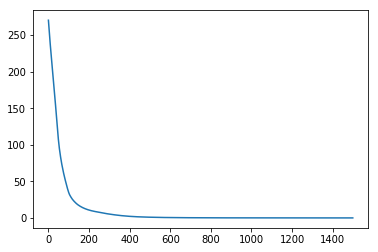

In [196]:

from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Masking



#create network
model = Sequential()
model.add(Masking(mask_value=0,         input_shape=(4,
                                               3) 
                                 ))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

#fit network
history = model.fit(trainX, trainy, epochs=1500)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [197]:
yhat = model.predict(np.array([[[0.5,0.5,0.5],[1.5,2.5,3.5],[2.5,4.5,6.5],[3.5,6.5,9.5]]]))
print(yhat)
#WORKS!!

[[12.442815]]


In [ ]:
#plot each column
groups = [2,3,4,5]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(time_series.columns[group], y=0.5, loc='right')
	i += 1
plt.show()